# Week 4 -  Quantum information with multipartite systems <a class="tocSkip">
    (c) Ariel Guerreiro 2023

In this notebook, we will explore the nature of bipartite quantum systems and how they can become entangled, creating the famous Bell states. We will discuss the properties of entanglement and the role it plays in quantum information processing. Additionally, we will examine how noise and decoherence can disrupt the entanglement of a system, leading to the breakdown of quantum correlations.

Finally, we will introduce the Bell inequalities, which are a set of mathematical conditions that provide a way to test whether a system is truly entangled or not. These inequalities have important implications for our understanding of quantum mechanics and have been the subject of intense study for decades.

Throughout this notebook, we will use interactive examples and exercises to help you gain a deeper understanding of these complex topics.

# Before we start... <a class="tocSkip">
 
  Let us begin by runnning the initialization cell
    
$$
\def\ket#1{\left|#1\right\rangle }%
\def\bra#1{\left\langle #1\right|}%
\def\braket#1#2{\langle#1|#2\rangle}%
$$
   

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import random
import re  # regular expressions module

from qiskit import QuantumCircuit, execute, Aer
import qiskit.quantum_info as qi

from qiskit import *
from qiskit.visualization import *
from qiskit.tools import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# The Bell basis <a name='BellBasis'></a>


The Bell basis is a set of four maximally entangled states of two qubits that play a fundamental role in quantum information theory. They are important in the context of bipartite qubit systems because they provide a natural basis for describing entanglement between two qubits.

In particular, any bipartite pure state of two qubits can be expressed as a superposition of the four Bell states. This property makes the Bell basis useful for studying and characterizing entanglement in quantum systems, as it provides a convenient way to decompose any bipartite state into entangled and separable components.

For bipartite register, i.e. a set of two quantum registers each storing a qubit, the elements of Bell basis are defined as

\begin{align*}
\ket{\Phi^{+}} & :=\frac{1}{\sqrt{2}}\left(\ket{00}+\ket{11}\right)\\
\ket{\Phi^{-}} & :=\frac{1}{\sqrt{2}}\left(\ket{00}-\ket{11}\right)\\
\ket{\Psi^{+}} & :=\frac{1}{\sqrt{2}}\left(\ket{01}+\ket{10}\right)\\
\ket{\Psi^{-}} & :=\frac{1}{\sqrt{2}}\left(\ket{01}-\ket{10}\right)
\end{align*}


In [ ]:
Phi_plus = [mt.sqrt(0.5),0, 0, mt.sqrt(0.5)] # 00 01 10 11
Phi_minus = [mt.sqrt(0.5),0, 0, -mt.sqrt(0.5)]
Psi_plus = [0,mt.sqrt(0.5), mt.sqrt(0.5),0]
Psi_minus = [0,mt.sqrt(0.5),- mt.sqrt(0.5),0]

q = QuantumRegister(2)
c = ClassicalRegister(2)

circuit1 = QuantumCircuit(q,c)

circuit1.initialize(Phi_minus, [q[0],q[1]])

simulator = Aer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit1, simulator).result()
outputstate = result.get_statevector(circuit1, decimals=3)
print('outputstate:',outputstate)
plot_state_city(outputstate)

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>    
The code then defines four quantum states, namely Phi_plus, Phi_minus, Psi_plus, and Psi_minus. It then creates a quantum circuit using the QuantumRegister and ClassicalRegister objects from qiskit. The circuit is initialized in the Phi_minus state on the first and second qubits. Next, the code sets up a backend simulator for executing the circuit using Aer.get_backend('statevector_simulator'), which simulates the quantum circuit and returns the final statevector of the circuit.
The execute method from qiskit is called on the result object to run the circuit on the simulator. The result object then retrieves the final statevector from the circuit using the get_statevector method with a specified number of decimals.
Finally, the output state vector is printed, and the plot_state_city function is called from qiskit's visualization module to create a city-plot representation of the output state.
    
</div>

This will produce a plot_state_city plot of the Bell state, which will have non-zero off-diagonal elements. This suggests that the Bell state is entangled.

Note that plot_state_city is not always the most useful tool for visualizing entanglement, as it can be difficult to visually identify off-diagonal elements in larger systems. Other tools, such as plot_state_qsphere or plot_bloch_multivector, may be more helpful in some cases.

If we try to measure/observe Bell states in the canonical basis, we will collapse the state of the qubits into one of the two computational basis states with equal probability. This is because Bell states are superpositions of computational basis states, and a measurement in the computational basis will collapse the state into one of the basis states with a probability proportional to the squared amplitude of that basis state in the superposition. Therefore, measuring a Bell state in the computational basis will destroy the entanglement between the qubits.

In [ ]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

simulator = Aer.get_backend('qasm_simulator')

circuit1 = QuantumCircuit(q,c)

circuit1.initialize(Phi_plus, [q[0],q[1]])
circuit1.measure(q[0],c[0])
circuit1.measure(q[1],c[1])
circuit1.draw(output='mpl')

result1 = execute(circuit1, backend = simulator, shots=10000).result()
count1 = result1.get_counts(circuit1)
print(count1)

circuit2 = QuantumCircuit(q,c)
circuit2.initialize(Phi_minus, [q[0],q[1]])
circuit2.measure(q[0],c[0])
circuit2.measure(q[1],c[1])
circuit2.draw(output='mpl')


result2 = execute(circuit2, backend = simulator, shots=10000).result()
count2 = result2.get_counts(circuit2)
print(count2)


circuit3 = QuantumCircuit(q,c)

circuit3.initialize(Psi_plus, [q[0],q[1]])
circuit3.measure(q[0],c[0])
circuit3.measure(q[1],c[1])
circuit3.draw(output='mpl')

result3 = execute(circuit3, backend = simulator, shots=10000).result()
count3 = result3.get_counts(circuit3)
print(count3)

circuit4 = QuantumCircuit(q,c)
circuit4.initialize(Psi_minus, [q[0],q[1]])
circuit4.measure(q[0],c[0])
circuit4.measure(q[1],c[1])
circuit4.draw(output='mpl')


result4 = execute(circuit4, backend = simulator, shots=10000).result()
count4 = result4.get_counts(circuit4)
print(count4)

plot_histogram([count1,count2,count3,count4],legend=['Phi_plus','Phi_minus','Psi_plus','Psi_minus'])

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>    
This code creates four quantum circuits and visualizes the measurement results using a histogram.
First, it creates a QuantumRegister and a ClassicalRegister object with 2 qubits and classical bits. Then, it sets up a backend simulator for the QASM (quantum assembly) language using Aer.get_backend('qasm_simulator').Next, four separate quantum circuits are created using the same QuantumRegister and ClassicalRegister. Each circuit is initialized in a different quantum state (Phi_plus, Phi_minus, Psi_plus, and Psi_minus) using the initialize method. The measure method is then called on each qubit, mapping the state of the qubit onto a classical bit in the ClassicalRegister.After each circuit is constructed, it is executed on the simulator using the execute method from qiskit with a specified number of shots (i.e., the number of times the circuit is run to obtain measurement statistics). The results of each circuit execution are then retrieved using the result method, and the measurement statistics are extracted using the get_counts method, which returns a dictionary of bitstrings and their corresponding counts. Finally, a histogram is created using plot_histogram from qiskit's visualization module to plot the measurement statistics for each circuit. The histogram plots the frequency of each bitstring in the counts dictionary for each circuit, with the bitstring on the x-axis and the count on the y-axis. The legend parameter in plot_histogram is used to label each histogram bar with its corresponding quantum state.
    
</div>

This illustrates that entanglement cannot be observed directly, but can only be inferred through measurements performed on multiple copies of the system. It also emphasizes the importance of preserving the entanglement of a system when performing quantum information processing tasks, as any measurement that destroys the entanglement will lead to the loss of quantum information.

# Decoherence and noise

Decoherence refers to the loss of quantum coherence in a quantum system due to its interaction with its environment. In quantum mechanics, the evolution of a quantum state is described by a unitary transformation, but when a quantum system is coupled to its environment, its evolution becomes non-unitary and irreversible. This results in the loss of quantum coherence and the appearance of classical-like behavior.

Noise in quantum systems refers to any unwanted external influence that can disturb the quantum state and result in errors or inaccuracies in measurements. Examples of noise in quantum systems include thermal noise, which arises from the random motion of atoms and molecules in the environment, and electrical noise, which can arise from fluctuations in electromagnetic fields.

Emulating decoherence in Qiskit simulations is crucial because it allows us to study the effects of noise on quantum algorithms and to develop strategies to mitigate those effects. Decoherence arises from the interaction of a quantum system with its environment, which leads to a loss of coherence and information, and can cause errors in quantum computations.

In Qiskit, decoherence is typically modeled using a noise model that consists of a set of quantum errors that describe the effects of noise and imperfections in a quantum computer. These errors can include gate errors, measurement errors, and initialization errors, among others. By adding these errors to a simulation, we can study the impact of noise on a quantum algorithm and evaluate the effectiveness of error mitigation techniques.

In quantum computing, a common type of noise is the bit flip error, which occurs when a qubit spontaneously flips from a 0 state to a 1 state or vice versa. The Qiskit model for bit flip noise involves adding a stochastic error to the ideal unitary gate, resulting in a probabilistic mixture of the ideal gate and the identity gate. This model is used to simulate the effects of noise on quantum circuits and to test the robustness of quantum algorithms against noise.


Let us provide a simple example of bit flip error:

In [ ]:
from qiskit.providers.aer import AerSimulator

# Qiskit Aer noise module imports
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import QuantumError, ReadoutError
from qiskit.providers.aer.noise.errors import pauli_error
from qiskit.providers.aer.noise.errors import depolarizing_error
from qiskit.providers.aer.noise.errors import thermal_relaxation_error

# System Specification
n_qubits = 2
circuit8 = QuantumCircuit(n_qubits, n_qubits)

# Test Circuit
circuit8.h(0)
for qubit in range(n_qubits - 1):
    circuit8.cx(qubit, qubit + 1)
    
circuit8.barrier()
circuit8.measure(range(n_qubits), range(n_qubits))

# Simulator
simulator = AerSimulator()

circuit8.draw(output='mpl')


<div class="alert alert-block alert-info">
<b>Question 1:</b> Can you tell which state is generated by this circuit? Is this a relevant state? Why? 
</div>

We start with a state, $|\psi\rangle=|0\rangle \bigotimes |0\rangle=|00\rangle$, where both qubits will be transformed,

$$q0=|0\rangle\xRightarrow{H}\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=|+\rangle$$

$$q1=|0\rangle$$

Therefore, this will produce the state, $|+\rangle \bigotimes |0\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|10\rangle)=|\psi'\rangle$

Then setting the first qubit as the control and the second qubit as the target:

$$
|\psi'\rangle= \frac{1}{\sqrt{2}}(|00\rangle+|10\rangle) \xRightarrow{CNOT} \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)=|\psi''\rangle
$$

This is a relevant state because it's an entangled state.

To facilitate comparison, we start by simulating the outcome in the absence of noise.

In [ ]:
# Ideal execution
job = execute(circuit8, simulator)
result_ideal = job.result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal, legend = ["ideal"])

An then add some noise model emulating the presence of bit-flip errors in a quantum computer. The noise model is defined by three error probabilities: p_reset, p_meas, and p_gate1.

* p_reset is the probability that a qubit is reset to the $|0⟩$ state before a quantum operation is applied to it.
* p_meas is the probability that a bit-flip error occurs during a measurement, leading to an incorrect measurement outcome.
* p_gate1 is the probability that a bit-flip error occurs during a single-qubit gate operation.

Using these error probabilities, QuantumError objects are defined to represent the bit-flip errors that can occur during the three different types of operations: reset, measurement, and single-qubit gates. These error objects are then added to a NoiseModel object, which represents the complete noise model for a quantum computer with bit-flip errors.

The add_all_qubit_quantum_error() method is used to add the error objects to the noise model for all qubits and all gates of the specified types. Finally, the print() method is used to print a summary of the noise model.

In [ ]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

In [ ]:
# Run the noisy simulation
job = execute(circuit8, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram([counts_ideal,counts_bit_flip], legend = ["ideal","bit_flip"])

<div class="alert alert-block alert-warning">
<b>Code Explained: </b> This code demonstrates how to simulate the effect of noise on a quantum circuit using Qiskit's AerSimulator and NoiseModel classes.
The first part of the code imports the necessary modules and defines the system specification, which in this case is a quantum circuit with two qubits. The circuit applies a Hadamard gate to the first qubit and a controlled-NOT gate between the two qubits. It then measures both qubits and stores the results in two classical registers.

The next part of the code creates an instance of the AerSimulator class and executes the circuit on the ideal simulator using the execute() method of the QuantumCircuit class. The resulting counts are stored in a dictionary called counts_ideal and plotted using Qiskit's plot_histogram() function.

The following section of the code defines the error probabilities for reset, measurement, and gate errors, and creates QuantumError objects for each type of error using Qiskit's pauli_error() function. These errors are then combined into a NoiseModel object called noise_bit_flip, which simulates the effect of bit-flip errors on the qubits.

Finally, the circuit is executed again using the noisy simulator and the resulting counts are stored in a dictionary called counts_bit_flip. Both the ideal and noisy counts are plotted together using Qiskit's plot_histogram() function, with the legend indicating whether each count corresponds to the ideal or noisy simulation. The resulting plot shows how noise affects the measurement outcomes of the circuit.
    
    
</div>

One way to emulate decoherence in Qiskit is to use a noise model based on the characteristics of a real quantum computer, such as the T1 and T2 times of the qubits, the gate error rates, and the readout error rates. This approach allows us to simulate the effects of noise on a specific device and to optimize the performance of a quantum algorithm for that device.

A limitation of emulating decoherence in Qiskit simulations is that it may not capture all of the effects of noise and imperfections in a real quantum computer. In particular, the noise model may not account for non-Markovian effects, which can arise from the coupling between the qubits and the environment, and can lead to more complex and correlated errors. Furthermore, the noise model may not capture all of the variations and fluctuations in the real device, which can be difficult to model accurately.

Despite these limitations, emulating decoherence in Qiskit simulations has important applications in quantum information, such as in the development and testing of error correction codes, the evaluation of the performance of quantum algorithms under realistic conditions, and the optimization of the hardware and software for a specific quantum device.


Let us provide an example:

In [ ]:
# T1 and T2 values for qubits 0-3
T1s = np.random.normal(50e3, 10e3, n_qubits) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(50e3, 10e3, n_qubits)  # Sampled from normal distribution mean 50 microsec

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(n_qubits)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(n_qubits):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(n_qubits):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal)

The noise model described in the code simulates thermal relaxation errors in qubits of a quantum computer. The T1 and T2 values for qubits are randomly sampled from a normal distribution, which represent the average time it takes for a qubit to lose coherence due to energy dissipation and other factors.

The time for each quantum gate, such as u1, u2, u3, cx, reset, and measure, is also defined. Using these parameters, thermal relaxation errors are generated and added to the noise model. For each qubit, the noise model adds errors for reset, measure, u1, u2, and u3 gates. For two-qubit gates, such as the cx gate, errors are added for each qubit pair.

Thermal relaxation errors cause the amplitude and phase of a qubit to decay over time, which reduces the probability of getting the correct outcome when performing quantum operations. This noise model helps to simulate these errors and estimate their impact on the performance of a quantum algorithm.

In [ ]:
# Run the noisy simulation
job = execute(circuit8, simulator,
              basis_gates=noise_thermal.basis_gates,
              noise_model=noise_thermal)
result_thermal = job.result()
counts_thermal = result_thermal.get_counts(0)

# Plot noisy output
plot_histogram([counts_ideal,counts_bit_flip,counts_thermal], legend = ["ideal","bit_flip","thermal"])

<div class="alert alert-block alert-warning">
<b>Code Explained: </b> 
    
This code is an example of how to simulate a noisy quantum circuit using Qiskit. The code first generates T1 and T2 values for each qubit in the circuit from a normal distribution with a mean of 50 microseconds and a standard deviation of 10 microseconds. T1 and T2 represent the decoherence times for a qubit's relaxation and dephasing processes, respectively.

The T2 values are truncated to be no greater than twice the T1 value, as this is a physical constraint on the coherence times of a qubit.

Next, the code defines the instruction times for various quantum gates, including U1, U2, U3, CX, reset, and measure gates, and creates QuantumError objects that model thermal relaxation errors for each of these gates using the T1 and T2 values generated previously.

The code then adds these errors to a noise model, which is used to simulate the noisy quantum circuit using the execute function in Qiskit. The resulting noisy output is plotted alongside the ideal and bit-flip error corrected outputs for comparison.

Overall, this code provides an example of how to incorporate realistic noise models into quantum circuit simulations using Qiskit.
    
</div>

# Bell inequalities

Bell inequalities are a set of mathematical inequalities that express constraints on the possible correlation between the outcomes of measurements made on two spatially separated quantum systems. These inequalities were first derived by John S. Bell in the 1960s, and they played a crucial role in demonstrating that quantum mechanics violates the principles of local realism, which is the idea that physical objects have definite properties, independent of measurements and that these properties can be transmitted between objects no faster than the speed of light.

The violation of Bell inequalities has important implications for quantum information processing, as it demonstrates that entangled quantum states cannot be explained by classical physics and suggests the possibility of using quantum entanglement for communication and computation tasks that are impossible using classical resources.

In particular, the violation of Bell inequalities is the basis for quantum key distribution (QKD), a protocol that allows two parties to establish a shared secret key with information-theoretic security, even in the presence of an eavesdropper. Bell tests have also been used in experimental demonstrations of quantum teleportation, quantum dense coding, and quantum error correction.

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Create a circuit with two qubits and two classical bits
circuit = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
circuit.h(0)

# Apply CNOT gate to entangle the two qubits
circuit.cx(0, 1)

# Measure the two qubits
circuit.measure(0, 0)
circuit.measure(1, 1)

# Run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()

# Get the counts of the measurements
counts = result.get_counts()

# Print the results
print("Measurement results:")
print(counts)

# Plot the histogram of the results
plot_histogram(counts)

This circuit prepares the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and measures the two qubits in the computational basis. The results of the measurements are then used to verify Bell inequalities.


The circuit creates an entangled state of two qubits, which is a key ingredient in the violation of Bell inequalities. When the two qubits are measured, they will be found in one of the four possible basis states |00⟩, |01⟩, |10⟩, and |11⟩ with some probabilities. These probabilities are related to the state of the qubits before measurement, which in the case of entangled qubits cannot be described by local hidden variables.

Bell inequalities are mathematical expressions that can be derived from the assumptions of local realism and stochasticity. Local realism states that the outcomes of measurements on one particle cannot be influenced by measurements performed on the other particle if the two particles are sufficiently far apart. Stochasticity assumes that the outcomes of measurements are probabilistic and that the probabilities are determined by local hidden variables.

However, experiments have shown that entangled quantum particles violate Bell inequalities, indicating that they do not behave according to local realism and stochasticity. This violation can be seen as evidence that quantum mechanics does not allow for a description of nature that is both local and realistic.

The circuit in the code is a simple example of an entangled state that can violate Bell inequalities. The expected results of the measurements are that the |00⟩ and |11⟩ states are more likely to occur than the |01⟩ and |10⟩ states. These probabilities cannot be explained by local hidden variables and are a signature of entanglement in quantum mechanics.

Here's a code that allows you to vary the degree of entanglement and compare the predictions of quantum and classical theory with the results of the simulation using a bar chart:

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Define a function to create the circuit for a given degree of entanglement
def create_circuit(theta):
    circuit = QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.ry(2 * theta, 1)  # Rotate the second qubit by 2*theta around the y-axis
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    return circuit

# Define a function to calculate the theoretical probabilities for a given degree of entanglement
def calculate_theoretical_probabilities(theta):
    p00 = np.cos(theta/2)**2
    p01 = np.sin(theta/2)**2
    p10 = np.sin(theta/2)**2
    p11 = np.cos(theta/2)**2
    return [p00, p01, p10, p11]

# Define the range of values of theta to explore
theta_range = np.linspace(0, np.pi, 21)

# Run the simulations and calculate the probabilities for each value of theta
results = []
for theta in theta_range:
    circuit = create_circuit(theta)
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots=1000)
    result = job.result()
    counts = result.get_counts()
    p00 = counts.get('00', 0) / 1000
    p01 = counts.get('01', 0) / 1000
    p10 = counts.get('10', 0) / 1000
    p11 = counts.get('11', 0) / 1000
    results.append([p00, p01, p10, p11])

# Calculate the theoretical probabilities for each value of theta
theoretical_results = [calculate_theoretical_probabilities(theta) for theta in theta_range]

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(theta_range))-0.2, [r[0] for r in results], width=0.4, label='00')
plt.bar(np.arange(len(theta_range))+0.2, [r[1] for r in results], width=0.4, label='01')
plt.bar(np.arange(len(theta_range))+0.6, [r[2] for r in results], width=0.4, label='10')
plt.bar(np.arange(len(theta_range))+1.0, [r[3] for r in results], width=0.4, label='11')
plt.plot(np.arange(len(theta_range)), theoretical_results, 'r--')
plt.xticks(np.arange(len(theta_range)), np.round(theta_range,2), fontsize=12)
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(fontsize=14)
plt.show()


The graphic produced by the previous code shows the results of the simulation and the predictions of the quantum theory for different degrees of entanglement between the two qubits.

The horizontal axis represents the degree of entanglement, which is controlled by the parameter theta. The values of theta range from 0 to pi/2, which correspond to no entanglement and maximum entanglement, respectively.

The vertical axis represents the probability of obtaining the result 00 when measuring the two qubits after applying the Hadamard gate and the CNOT gate. This probability is obtained by dividing the number of times that the result 00 is obtained in the simulation by the total number of shots.

The comparison between the results of the simulation and the predictions of the quantum and classical theories allows us to see the effect of entanglement on the correlations between the two qubits. When the two qubits are maximally entangled, the probabilities predicted by the quantum theory are close to 1, while the probabilities predicted by the classical theory are close to 0. This shows that entanglement is a characteristic feature of quantum mechanics that cannot be explained by classical theories.

To include thermal noise effects controlled by the temperature, we can use the amplitude damping and phase damping noise models in Qiskit. The amplitude damping noise model describes the effect of a qubit losing energy to its environment, while the phase damping noise model describes the effect of a qubit accumulating random phase shifts. The strength of these effects is controlled by the temperature parameter.

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import amplitude_damping_error, phase_damping_error
import matplotlib.pyplot as plt
import numpy as np

# Define a function to create the circuit for a given degree of entanglement
def create_circuit(theta, temperature):
    circuit = QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.ry(2 * theta, 1)  # Rotate the second qubit by 2*theta around the y-axis
    # Add amplitude damping noise to both qubits
    damping_error = amplitude_damping_error(temperature, 1)
    circuit.append(damping_error, [0])
    circuit.append(damping_error, [1])
    # Add phase damping noise to the second qubit
    damping_error = phase_damping_error(temperature, 1)
    circuit.append(damping_error, [1])
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    return circuit

# Define a function to calculate the theoretical probabilities for a given degree of entanglement
def calculate_theoretical_probabilities(theta):
    p00 = np.cos(theta/2)**2
    p01 = np.sin(theta/2)**2
    p10 = np.sin(theta/2)**2
    p11 = np.cos(theta/2)**2
    return [p00, p01, p10, p11]

# Define the range of values of theta to explore
theta_range = np.linspace(0, np.pi, 21)

# Define the temperature
temperature = 0.5

# Run the simulations and calculate the probabilities for each value of theta
results = []
for theta in theta_range:
    circuit = create_circuit(theta, temperature)
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots=1000)
    result = job.result()
    counts = result.get_counts()
    p00 = counts.get('00', 0) / 1000
    p01 = counts.get('01', 0) / 1000
    p10 = counts.get('10', 0) / 1000
    p11 = counts.get('11', 0) / 1000
    results.append([p00, p01, p10, p11])

# Calculate the theoretical probabilities for each value of theta
theoretical_results = [calculate_theoretical_probabilities(theta) for theta in theta_range]

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(theta_range))-0.2, [r[0] for r in results], width=0.4, label='00')
plt.bar(np.arange(len(theta_range))+0.2, [r[1] for r in results], width=0.4, label='01')
plt.bar(np.arange(len(theta_range))+0.6, [r[2] for r in results], width=0.4, label='10')
plt.bar(np.arange(len(theta_range))+1.0, [r[3] for r in results], width=0.4, label='11')
plt.plot(np.arange(len(theta_range)), theoretical_results, 'r--')
plt.xticks(np.arange(len(theta_range)), np.round(theta_range,2), fontsize=12)
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(fontsize=14)
plt.show()



<div class="alert alert-block alert-info">
<b>Question 2:</b> What would be the quantum and classical predictions for the two last examples?
</div>

**EXERCISES:**
    


In [ ]:
Phi_plus = [mt.sqrt(0.5),0, 0, mt.sqrt(0.5)] # 00 01 10 11
Phi_minus = [mt.sqrt(0.5),0, 0, -mt.sqrt(0.5)]
Psi_plus = [0,mt.sqrt(0.5), mt.sqrt(0.5),0]
Psi_minus = [0,mt.sqrt(0.5),- mt.sqrt(0.5),0]

**Exercise 1:**

Determine the amount of entanglement of the states (you can use a monotone if necessary):
    
   a) $ |\psi\rangle = \sqrt{\mu} |\Phi^{+}\rangle + \sqrt{1-\mu} \exp{(i\theta)}|\Phi^{-}\rangle $ 
     as a function of $\mu$ and $\theta$;
    
    


STATE:
$$|\psi\rangle=\sqrt{\mu}\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)+\sqrt{1-\mu}\exp(i\theta)\frac{1}{\sqrt{2}}(|00\rangle-|11\rangle)=\frac{1}{\sqrt{2}}\left\{\left[\sqrt{\mu}+\sqrt{1-\mu}\exp(i\theta)\right]|00\rangle+\left[\sqrt{\mu}-\sqrt{1-\mu}\exp(i\theta)\right]|11\rangle\right\}$$


DENSITY MATRIX:
$$
\begin{align}
\rho&=|\psi\rangle\langle\psi|=\frac{1}{\sqrt{2}}\left\{\left[\sqrt{\mu}+\sqrt{1-\mu}\exp(i\theta)\right]|00\rangle+\left[\sqrt{\mu}-\sqrt{1-\mu}\exp(i\theta)\right]|11\rangle\right\}\frac{1}{\sqrt{2}}\left\{\left[\sqrt{\mu}+\sqrt{1-\mu}\exp(-i\theta)\right]\langle00|+\left[\sqrt{\mu}-\sqrt{1-\mu}\exp(-i\theta)\right]\langle11|\right\}\\[8pt]
&=\frac{1}{2}\left[\sqrt{\mu}+\sqrt{1-\mu}\exp(i\theta)\right]\left[\sqrt{\mu}+\sqrt{1-\mu}\exp(-i\theta)\right]|00\rangle\langle00|+\frac{1}{2}\left[\sqrt{\mu}+\sqrt{1-\mu}\exp(i\theta)\right]\left[\sqrt{\mu}-\sqrt{1-\mu}\exp(-i\theta)\right]|00\rangle\langle11|\\[8pt]
&+\frac{1}{2}\left[\sqrt{\mu}-\sqrt{1-\mu}\exp(i\theta)\right]\left[\sqrt{\mu}+\sqrt{1-\mu}\exp(-i\theta)\right]|11\rangle\langle00|+\frac{1}{2}\left[\sqrt{\mu}-\sqrt{1-\mu}\exp(i\theta)\right]\left[\sqrt{\mu}-\sqrt{1-\mu}\exp(-i\theta)\right]|11\rangle\langle11|\\[8pt]
&=\frac{1}{2}\left[1+2\sqrt{\mu}\sqrt{1-\mu}\cos(\theta)\right]|00\rangle\langle00|+\frac{1}{2}\left[2\mu+2i\sqrt{\mu}\sqrt{1-\mu}\sin(\theta)-1\right]|00\rangle\langle11|\\[8pt]
&+\frac{1}{2}\left[2\mu-2i\sqrt{\mu}\sqrt{1-\mu}\sin(\theta)-1\right]|11\rangle\langle00|+\frac{1}{2}\left[1-2\sqrt{\mu}\sqrt{1-\mu}\cos(\theta)\right]|11\rangle\langle11|\\[10pt]
&=\frac{1}{2}\begin{pmatrix}
\left[1+2\sqrt{\mu}\sqrt{1-\mu}\cos(\theta)\right] & 0 & 0 & \left[2\mu+2i\sqrt{\mu}\sqrt{1-\mu}\sin(\theta)-1\right]\\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\left[2\mu-2i\sqrt{\mu}\sqrt{1-\mu}\sin(\theta)-1\right] & 0 & 0 & \left[1-2\sqrt{\mu}\sqrt{1-\mu}\cos(\theta)\right]
\end{pmatrix}
\end{align}
$$

Lets use Schmidt decomposition

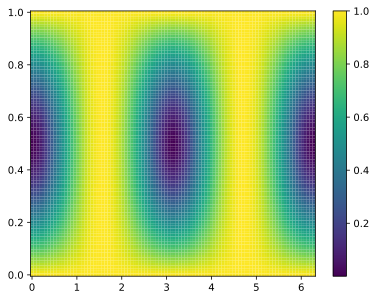

In [23]:
kb=1
N=4

theta=np.linspace(0,2*np.pi,100)
miu=np.linspace(0,1,100)

deg_mix=np.zeros((len(miu),len(theta)))

for i in range(0,len(miu)):
    for j in range(0,len(theta)):
        A=2*np.sqrt(1-miu[i])*np.sqrt(miu[i])*np.cos(theta[j])
        B=2*1j*np.sqrt(miu[i]*(1-miu[i]))*np.sin(theta[j])
        dens_matrix=1/2*np.array([[1+A,0,0,2*miu[i]+B-1],[0,0,0,0],[0,0,0,0],[2*miu[i]-B-1,0,0,1-A]])
        dens_matrix_partial=qi.partial_trace(dens_matrix,[1])
        deg_mix[i,j]=qi.entropy(dens_matrix_partial)

plt.pcolormesh(theta,miu,deg_mix)
plt.colorbar()
plt.show()

   b) $ \rho = p |\Phi^{+}\rangle\langle\Phi^{+}| + (1-p) |\Phi^{-}\rangle \langle\Phi^{-}|$ 
     as a function of $\mu$.
    


$$\begin{align}\rho&=p\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)\frac{1}{\sqrt{2}}(\langle00|+\langle11|)+(1-p)\frac{1}{\sqrt{2}}(|00\rangle-|11\rangle)\frac{1}{\sqrt{2}}(\langle00|-\langle11|)\\[5pt]
&=\frac{p}{2}(|00\rangle+|11\rangle)(\langle00|+\langle11|)+\frac{1-p}{2}(|00\rangle-|11\rangle)(\langle00|-\langle11|)\\[5pt]
&=\frac{p}{2}(|00\rangle\langle00|+|11\rangle\langle00|+|00\rangle\langle11|+|11\rangle\langle11|)+\frac{1-p}{2}(|00\rangle\langle00|-|11\rangle\langle00|-|00\rangle\langle11|+|11\rangle\langle11|)\\[5pt]
&=\left(\frac{p}{2}+\frac{1-p}{2}\right)|00\rangle\langle00|+\left(\frac{p}{2}-\frac{1-p}{2}\right)|11\rangle\langle00|+\left(\frac{p}{2}-\frac{1-p}{2}\right)|00\rangle\langle11|+\left(\frac{p}{2}+\frac{1-p}{2}\right)|11\rangle\langle11|)\\[5pt]
&=|00\rangle\langle00|+(p-1/2)|11\rangle\langle00|+(p-1/2)|00\rangle\langle11|+|11\rangle\langle11|)\\[5pt]
&=\begin{pmatrix}1 & 0 & 0 &p-1/2 \\ 0& 0&0&0\\0&0&0&0\\ p-1/2 &0&0& 1\end{pmatrix}
\end{align}$$

As it can be observed taking this approach will result in inconsisntences as $Tr(\rho)>1$, and so lets use the Peres-Horodecki Criterion

From the definition the partial transpose:
$$
\rho^{T_B}=\sum_{ijkl}p^{ij}_{kl}|i\rangle\langle j| \otimes (|k\rangle\langle l|)^T=\sum_{ijkl}p^{ij}_{kl}|i\rangle\langle j| \otimes |l\rangle\langle k|=\begin{pmatrix}1 & 0 & 0 &0 \\ 0& 0&p-1/2&0\\0&p-1/2&0&0\\ 0 &0&0& 1\end{pmatrix}

$$

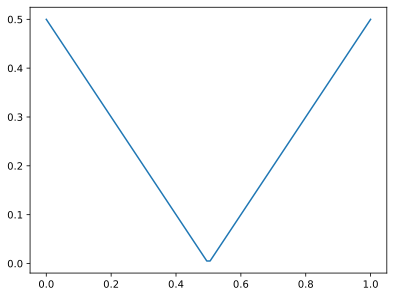

In [52]:
p=np.linspace(0,1,100)

w=np.zeros(len(p))

for i in range(0,len(p)):
    dens_matrix=np.array([[1,0,0,0],[0,0,p[i]-1/2,0],[0,p[i]-1/2,0,0],[0,0,0,1]])
    v,k=np.linalg.eig(dens_matrix)
    w[i]=min(v)

plt.plot(p,-w)
plt.show()

    
**Exercise 2:**

Determine the amount of entanglement of the states (you can use a monotone if necessary):
    
   a) $ |\psi\rangle = \sqrt{\mu} |\Phi^{+}\rangle + \sqrt{1-\mu} \exp{(i\theta)}|\Psi^{-}\rangle $ 
     as a function of $\mu$ and $\theta$;
    


STATE:
$$|\psi\rangle=\sqrt{\mu}\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)+\sqrt{1-\mu}\exp(i\theta)\frac{1}{\sqrt{2}}(|01\rangle-|10\rangle)=\frac{1}{\sqrt{2}}[\sqrt{\mu}|00\rangle+\sqrt{1-\mu}\exp(i\theta)|01\rangle-\sqrt{1-\mu}\exp(i\theta)|10\rangle+\sqrt{\mu}|11\rangle]$$


DENSITY MATRIX:
$$
\begin{align}
\rho&=|\psi\rangle\langle\psi|=\frac{1}{2}\left\{[\sqrt{\mu}|00\rangle+\sqrt{1-\mu}\exp(i\theta)|01\rangle-\sqrt{1-\mu}\exp(i\theta)|10\rangle+\sqrt{\mu}|11\rangle][\sqrt{\mu}\langle00|+\sqrt{1-\mu}\exp(-i\theta)\langle01|-\sqrt{1-\mu}\exp(-i\theta)\langle10|+\sqrt{\mu}\langle11|]\right\}\\[8pt]
&=\frac{1}{2}\begin{pmatrix}
\mu & \sqrt{\mu}\sqrt{1-\mu}\exp(-i\theta) & -\sqrt{\mu}\sqrt{1-\mu}\exp(-i\theta) & \mu\\
\sqrt{\mu}\sqrt{1-\mu}\exp(i\theta) & (1-\mu) & -(1-\mu) & \sqrt{\mu}\sqrt{1-\mu}\exp(i\theta) \\
-\sqrt{\mu}\sqrt{1-\mu}\exp(i\theta) & -(1-\mu) & (1-\mu) & -\sqrt{\mu}\sqrt{1-\mu}\exp(i\theta) \\
\mu & \sqrt{\mu}\sqrt{1-\mu}\exp(-i\theta) & -\sqrt{\mu}\sqrt{1-\mu}\exp(-i\theta) & \mu
\end{pmatrix}
\end{align}
$$

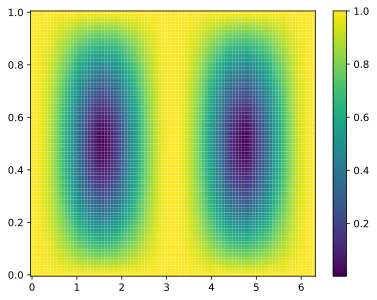

In [51]:
kb=1
N=4

theta=np.linspace(0,2*np.pi,100)
miu=np.linspace(0,1,100)

deg_mix=np.zeros((len(miu),len(theta)))

for i in range(0,len(miu)):
    for j in range(0,len(theta)):
        A=np.sqrt(1-miu[i])*np.sqrt(miu[i])*np.exp(1j*theta[j])
        dens_matrix=1/2*np.array([[miu[i],np.conjugate(A),-np.conjugate(A),miu[i]],[A,1-miu[i],-(1-miu[i]),A],[-A,-(1-miu[i]),1-miu[i],-A],[miu[i],np.conjugate(A),-np.conjugate(A),miu[i]]])
        dens_matrix_partial=qi.partial_trace(dens_matrix,[1])
        deg_mix[i,j]=qi.entropy(dens_matrix_partial)

plt.pcolormesh(theta,miu,deg_mix)
plt.colorbar()
plt.show()

   b) $ \rho = p |\Phi^{+}\rangle\langle\Phi^{+}| + (1-p) |\Psi^{-}\rangle \langle\Psi^{-}|$ 
     as a function of $\mu$.

$$\begin{align}\rho&=p\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)\frac{1}{\sqrt{2}}(\langle00|+\langle11|)+(1-p)\frac{1}{\sqrt{2}}(|01\rangle-|10\rangle)\frac{1}{\sqrt{2}}(\langle01|-\langle10|)\\[5pt]
&=\frac{p}{2}(|00\rangle+|11\rangle)(\langle00|+\langle11|)+\frac{1-p}{2}(|01\rangle-|10\rangle)(\langle01|-\langle10|)\\[5pt]
&=\frac{p}{2}(|00\rangle\langle00|+|11\rangle\langle00|+|00\rangle\langle11|+|11\rangle\langle11|)+\frac{1-p}{2}(|01\rangle\langle01|-|10\rangle\langle01|-|01\rangle\langle10|+|10\rangle\langle10|)\\[5pt]
&=\frac{1}{2}\begin{pmatrix}p & 0 & 0 &p \\ 0& 1-p&p+1&0\\0&p+1&1-p&0\\ p &0&0& p\end{pmatrix}
\end{align}$$

As it can be observed taking this approach will result in inconsisntences as $Tr(\rho)>1$, and so lets use the Peres-Horodecki Criterion

From the definition the partial transpose:
$$
\rho^{T_B}=\sum_{ijkl}p^{ij}_{kl}|i\rangle\langle j| \otimes (|k\rangle\langle l|)^T=\sum_{ijkl}p^{ij}_{kl}|i\rangle\langle j| \otimes |l\rangle\langle k|=\frac{1}{2}\begin{pmatrix}p & 0 & 0 &p+1 \\ 0& 1-p&p&0\\0&p&1-p&0\\ p+1 &0&0& p\end{pmatrix}

$$

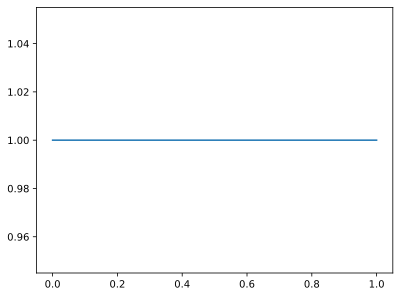

In [50]:
p=np.linspace(0,1,100)

w=np.zeros(len(p))

for i in range(0,len(p)):
    dens_matrix=np.array([[p[i],0,0,p[i]+1],[0,1-p[i],p[i],0],[0,p[i],1-p[i],0],[p[i]+1,0,0,p[i]]])
    v,k=np.linalg.eig(dens_matrix)
    w[i]=min(v)

plt.plot(p,-w)
plt.show()

**Exercise 3:**

What can you conclude from the previous two questions?



**Exercise 4:**

Develop an experiment to measure the evolution of the entropy and degree of entanglement as a function of time, for each of the  models of noise in section 2. 
    


**Exercise 5:**

Compare the results of the numerical experiments of the previous question with a real experiment in the IBM computer. (Yes, you need to get a token!)

<div class="alert alert-success">
<b>Today's afterthoughts:</b>

How do the concepts of entanglement and noise challenge our classical understanding of reality and influence our philosophical views on the nature of the universe?
</div>